# MATH 210 Introduction to Mathematical Computing

**March 22, 2024**

## Linear Algebra with NumPy and SciPy

There are a few different linear algebra packages in Python. We are going to use `scipy.linalg`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Create Matrices with NumPy

Create a matrix by entering values manually. The function `np.array` takes a list of lists of numbers and returns a 2D NumPy array.

In [2]:
A = np.array([[1.,1.],[-1.,1.]])

In [3]:
type(A)

numpy.ndarray

In [4]:
A.dtype

dtype('float64')

When we enter values, we should use floats (ie. `1.`) so that our matrices have float entries.

In [5]:
A.ndim

2

In [6]:
A.shape

(2, 2)

In [7]:
A[1,0]

-1.0

Create a 1D NumPy array:

In [8]:
v = np.array([2.,-1.])
v

array([ 2., -1.])

In [9]:
v.ndim

1

In [10]:
v.shape

(2,)

In [11]:
v[1]

-1.0

In [12]:
w = np.array([[2.],[-1.]])
w

array([[ 2.],
       [-1.]])

In [13]:
w.ndim

2

In [14]:
w.shape

(2, 1)

Create a 2D NumPy array of size $(1,2)$:

In [15]:
u = np.array([[2.,-1.]])
u

array([[ 2., -1.]])

In [16]:
u.shape

(1, 2)

Notice that if we select a row/column from a 2D NumPy array, we get a 1D NumPy array:

In [17]:
A

array([[ 1.,  1.],
       [-1.,  1.]])

In [18]:
A[:,0]

array([ 1., -1.])

Use NumPy functions to create larger matrices:

In [19]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [20]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [21]:
np.zeros((4,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The function `np.diag` creates a diagonal matrix from a vector:

In [23]:
D = np.diag(np.array([1.,2.,3.]))
D

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

## Matrix Multiplication

The symbol `@` does matrix multiplication:

In [24]:
A = np.array([[1.,2.],[2.,-4]])
A

array([[ 1.,  2.],
       [ 2., -4.]])

In [25]:
v = np.array([[5.],[-3.]])
v

array([[ 5.],
       [-3.]])

In [26]:
A@v

array([[-1.],
       [22.]])

In [27]:
w = np.array([5.,-3.])
w

array([ 5., -3.])

In [28]:
A@w

array([-1., 22.])

## Solving Linear Systems of Equations

The funciton `la.solve` computes the solution of $A \mathbf{x} = \mathbf{b}$ for square matrix $A$.

In [29]:
A = np.array([[1.,2.],[2.,1.]])
b = np.array([[5.],[-3.]])

In [30]:
x = la.solve(A,b)

In [31]:
x

array([[-3.66666667],
       [ 4.33333333]])

In [32]:
A = np.array([[1.,2.],[2.,1.]])
b = np.array([5.,-3.])

In [33]:
x = la.solve(A,b)
x

array([-3.66666667,  4.33333333])

In [34]:
A = np.array([[1.,2.],[2.,1.]])
b = np.array([[5.,-3.]])
x = la.solve(A,b)

ValueError: Input b has to have same number of rows as input a

Create the matrix of size $N$ with -2 on the diagonal and 1 on upper and lower diagonals.

In [35]:
N = 50
A1 = -2*np.eye(N)
A2 = np.diag(np.ones(N-1),1)
A3 = np.diag(np.ones(N-1),-1)
A = A1 + A2 + A3
A

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

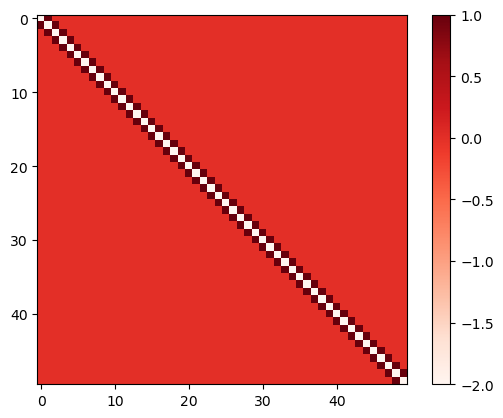

In [36]:
plt.imshow(A,cmap='Reds'), plt.colorbar()
plt.show()

Solve $A \mathbf{x} = \mathbf{b}$ where $A$ is the matrix above and $\mathbf{b}$ is a vector of 1s (of length $N$).

In [37]:
b = np.ones(N)
x = la.solve(A,b)

In [38]:
x.shape

(50,)

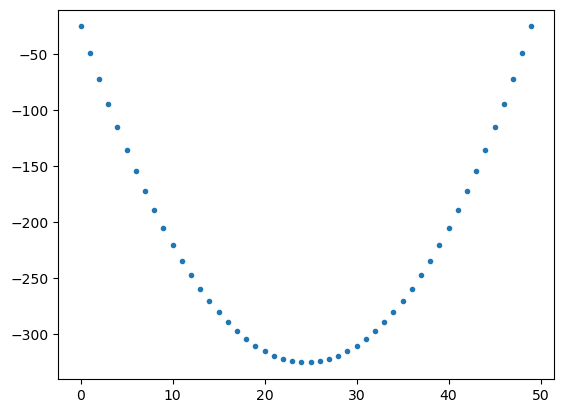

In [39]:
plt.plot(x,'.')
plt.show()

In [40]:
x

array([ -25.,  -49.,  -72.,  -94., -115., -135., -154., -172., -189.,
       -205., -220., -234., -247., -259., -270., -280., -289., -297.,
       -304., -310., -315., -319., -322., -324., -325., -325., -324.,
       -322., -319., -315., -310., -304., -297., -289., -280., -270.,
       -259., -247., -234., -220., -205., -189., -172., -154., -135.,
       -115.,  -94.,  -72.,  -49.,  -25.])

## Polynomial Interpolation

See [Mathematical Python](https://patrickwalls.github.io/mathematicalpython/linear-algebra/applications/#polynomial-interpolation).

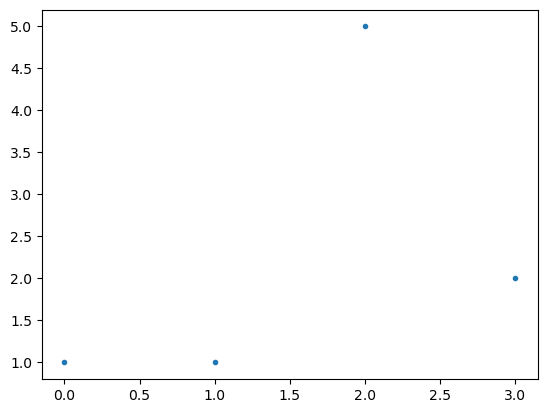

In [41]:
x = [0.,1.,2.,3.]
y = [1.,1.,5.,2.]
plt.plot(x,y,'.')
plt.show()

In [42]:
X = np.vander(x,increasing=True)
X

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [43]:
a = la.solve(X,y)
a

array([ 1.        , -5.66666667,  7.5       , -1.83333333])

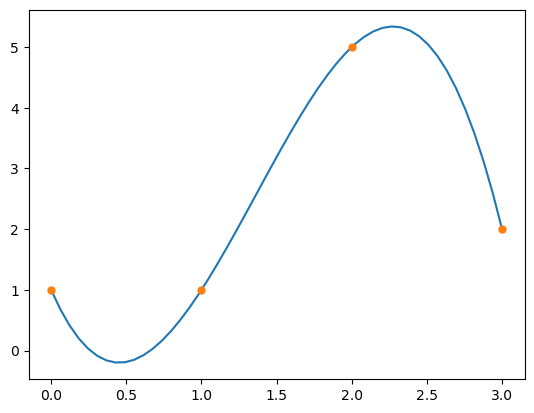

In [44]:
xs = np.linspace(0,3,50)
# ys = a[0] + a[1]*xs + a[2]*xs**2 + a[3]*xs**3
ys = sum([a[n]*xs**n for n in range(len(a))])
plt.plot(xs,ys)
plt.plot(x,y,'.',ms=10)
plt.show()